<a href="https://colab.research.google.com/github/blankspace24/ml/blob/main/lodistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],

      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [12]:
df=pd.DataFrame(data=d)
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [13]:
from sklearn.preprocessing import OrdinalEncoder
finished_race=['no','yes']
enc=OrdinalEncoder(categories=[finished_race])
df['completed_50m_ultra']=enc.fit_transform(df[['completed_50m_ultra']])
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


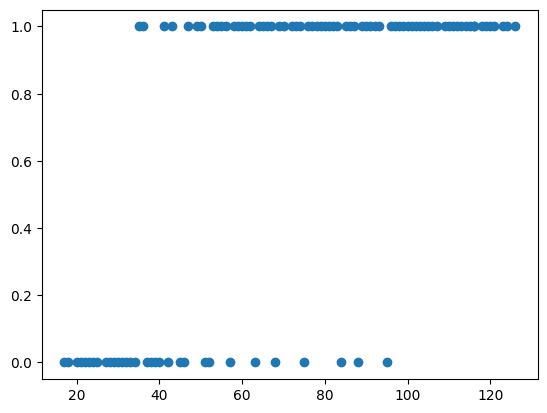

In [14]:
plt.scatter(df.miles_per_week,df.completed_50m_ultra)

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

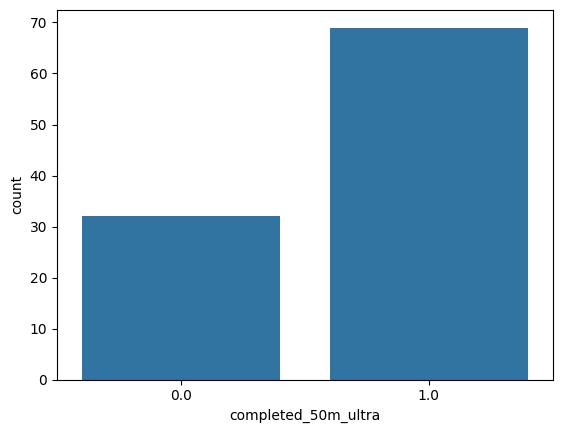

In [16]:
import seaborn as sns
sns.countplot(x='completed_50m_ultra',data=df)

In [18]:
x=df.iloc[:,0:1]
y=df.iloc[:,1]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)


In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
model.score(x_test,y_test)


0.9047619047619048

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5  2]
 [ 0 14]]
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83         7
         1.0       0.88      1.00      0.93        14

    accuracy                           0.90        21
   macro avg       0.94      0.86      0.88        21
weighted avg       0.92      0.90      0.90        21

